# Using Insitu Data with FluxEngine #

## Introduction
This script details how to visualise collected data and apply the FluxEngine functionalities to calculate air-sea gas flux

### Load Relevant Modules
To begin with the required Python packages are loaded (note: these are required to be installed in your environment first, else an error with appear). Also this is a good time to ensure you are running this script in the same environment where you have installed FluxEngine.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
# Install basemap-data-hires

### Loading the insitu data
Now we load the insitu data. This is very simple using the Pandas library where we can use the .read_csv() function, which can load CSV (Comma Seperated Values) or TSV (Tab Seperated Values) files. If you're using a CSV file the the 'sep' keyword should be changed to ',' but if using a TSV file then you can keep the sep='\t'. Additionally, the 'index_col' keyword is set to 0 to define that the first column in the data is simply indexing/counting the rows (i.e it's not actual data). You can try removing this with the example data to see what happens (it may help if for some reason your data does not include and index column).

Change the input file to either 'Carrick_Roads.tsv' or 'Agulhas.tsv' to load the example data, or input your own data file. We then show the first 5 rows of the data using the .head() function (and you can see the bottom 5 rows by changing this to .tail())

In [2]:
# Load data file
region_data = pd.read_csv('merged_draft_final.tsv', sep='\t', index_col=0)
# Show small proportion of the data
region_data.head(5)

,Lon,Lat,Datetime,Date,Year,Month,Day,Hour,Minute,Second,salinity,sstskin_c,sstskin_k,windu10,windu10_moment2,pco2sw_corr_split,pressure_met,pco2_air_noaa_2018
0,-5.027979,50.216161,14/09/2018 0:00,14/09/2018,2018,9,14,0,0,0,34.417400,16.709000,289.859000,2.057613,4.233772,500.019450,1024.1,401.3573
1,-5.027979,50.216161,14/09/2018 0:00,14/09/2018,2018,9,14,0,0,0,34.417400,16.709000,289.859000,2.057613,4.233772,488.055048,1024.1,401.3573
2,-5.027979,50.216161,14/09/2018 1:00,14/09/2018,2018,9,14,1,0,0,34.175967,16.681167,289.831167,2.057613,4.233772,550.944840,1023.9,401.3573
3,-5.027979,50.216161,14/09/2018 2:00,14/09/2018,2018,9,14,2,0,0,33.936400,16.606000,289.756000,2.572016,6.615269,588.035046,1023.5,401.3573
4,-5.027979,50.216161,14/09/2018 3:00,14/09/2018,2018,9,14,3,0,0,33.718900,16.542000,289.692000,2.572016,6.615269,627.313939,1022.9,401.3573


### Preparing to Plot the Recorded Data
We want to plot a 'time series' of the data that was recorded. One way to show this is to plot 'Days since [first recording]' along the x-axis and the data along the y-axis. The cell below finds the number of days since the first measurement (technically it finds the number of seconds since the first recording and divides this by 86,400) and creates a new column in the Dataframe to show these values.

Note: if your own dataset doesn't have columns for 'Year', 'Month', 'Day', etc. then the below won't work and you need to add this to your dataset. This can be done in Excel (but better to do it Pythonically if possible to prevent Excel making changes to it's own formatting), and see example datasets for the required format.

In [3]:
# Initialise the new Dataframe column and fill with a hold value
region_data['Days_since'] = 'hold value'

# Produce a datetime object for the first recording 
# - the zeros in the line below show it's the first row (index starts at zero)
start_date = dt.datetime(region_data.loc[0,'Year'],region_data.loc[0,'Month'],region_data.loc[0,'Day'],
                            region_data.loc[0,'Hour'],region_data.loc[0,'Minute'],region_data.loc[0,'Second'])

# Loop over all rows in the Dataframe - i.e from 0 to the length of the Dataframe
for i in range(0,len(region_data)):
    # Get the date time object for the currently indexed recording - indexed by i
    future_date = dt.datetime(region_data.loc[i,'Year'],region_data.loc[i,'Month'],region_data.loc[i,'Day'],
                              region_data.loc[i,'Hour'],region_data.loc[i,'Minute'],region_data.loc[i,'Second'])
    
    # Find difference between current datetime and inital datetime
    day_diff = future_date - start_date
    
    # Fill Dataframe column with time difference in seconds (found using .total_seconds()) 
    # divided by 86400 (proportion of days that have passed)
    region_data.loc[i,'Days_since'] = day_diff.total_seconds()/(60*60*24)

We can filter the Dataframe to show just the 'Datetime' and 'Days_since' columns. Showing the head can give an idea if the previous cell worked - although a more thorough check is advised if possible depending on Dataframe size.

In [4]:
# Filter data to 'Datetime' and 'Days_since' columns and show first 5 rows.
region_data[['Datetime', 'Days_since']].head(5)

,Datetime,Days_since
0,14/09/2018 0:00,0.0
1,14/09/2018 0:00,0.0
2,14/09/2018 1:00,0.041667
3,14/09/2018 2:00,0.083333
4,14/09/2018 3:00,0.125


### Plotting the Time Series  

The Matplotlib .subplots() function is ideal for this and I have used Seaborn to do the actual plotting - these two packages work well together as Seaborn is built on top of Matplotlib, and Seaborn also integrates easily with Pandas Dataframes. 

Producing nice looking plots with lovely axes labels and colors etc. can be fiddly, but you can refer to the documentation (and StackOverflow!) for hints and tips.

/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: 
The palette list has fewer values (427) than needed (428) and will cycle, which may produce an uninterpretable plot.
  app.launch_new_instance()
/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


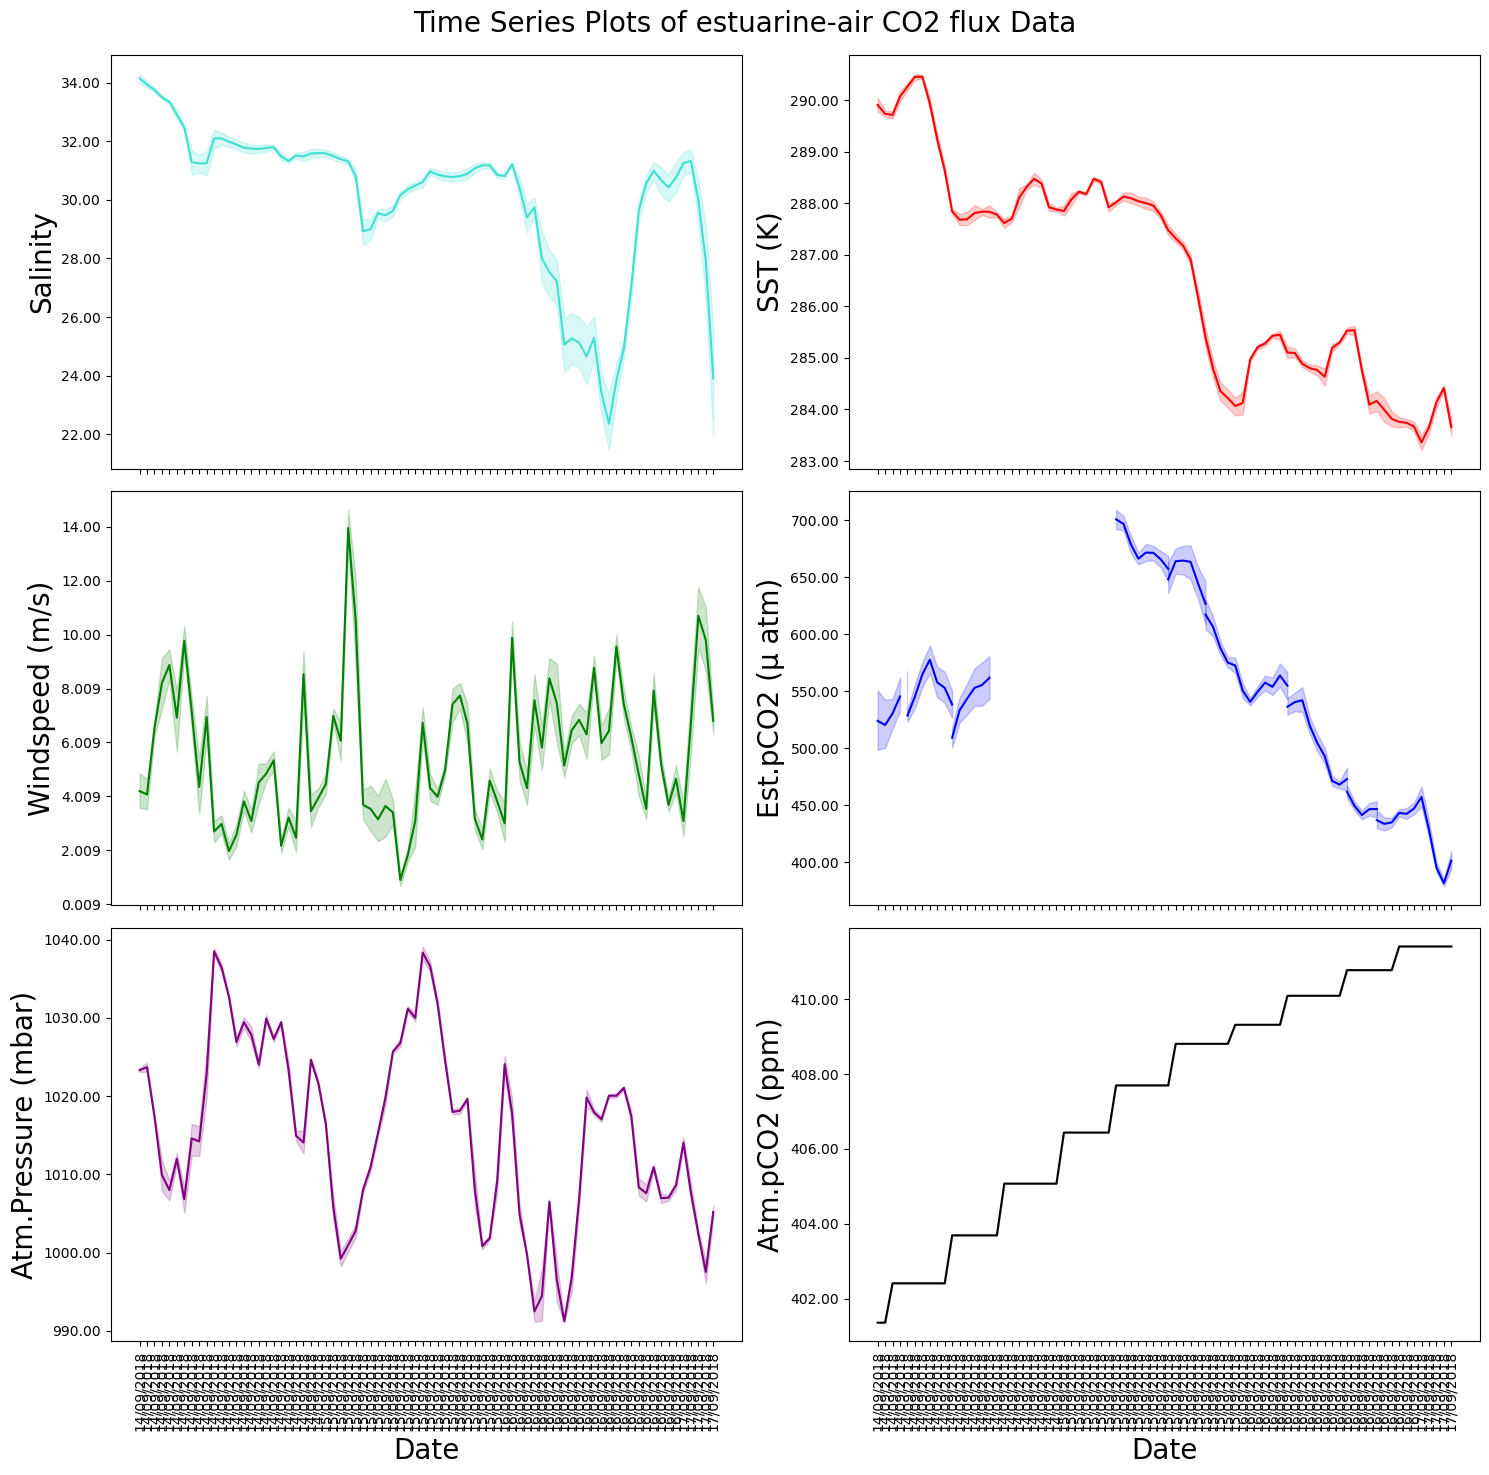

In [5]:
import matplotlib.dates as mdates

# Set up a figure with 4 axes on it. Sharex=True means all axes will share the bottom axes (can help with clarity)
fig,ax = plt.subplots(3,2, sharex=True)
# Set figure height and width
fig.set_figheight(15), fig.set_figwidth(15)
# Set overall title of subplots
fig.suptitle('Time Series Plots of estuarine-air CO2 flux Data', fontsize=20)

### PLOTTING THE DATA ### (- *s indicate a plot keyword below)
# These Seaborn commands state that we want a *lineplot*, where the *data* is coming 
# from our region_data Dataframe, and we chose the *x* & *y* columns that we want, as well
# as the axis (*ax*) we want to plot on (indexed by 0 at the top and 3 at the bottom)
sns.lineplot(data=region_data, x='Date', y='salinity', color='turquoise', ax=ax[0,0])
sns.lineplot(data=region_data, x='Date', y='sstskin_k', color='red', ax=ax[0,1])
sns.lineplot(data=region_data, x='Date', y='windu10', color='green', ax=ax[1,0])
sns.lineplot(data=region_data, x='Date', y='pco2sw_corr_split', color='orange', ax=ax[1,1], hue=region_data["pco2sw_corr_split"].isna().cumsum(), palette=["blue"]*sum(region_data["pco2sw_corr_split"].isna()), legend=False, markers=True)
sns.lineplot(data=region_data, x='Date', y='pressure_met', color='purple', ax=ax[2, 0])
sns.lineplot(data=region_data, x='Date', y='pco2_air_noaa_2018', color='black', ax=ax[2, 1])

# Set x axis label
ax[2,0].set_xlabel('Date', fontsize = 20) 
ax[2,1].set_xlabel('Date', fontsize = 20) 
ax[2,0].set_xticklabels(region_data['Date'], rotation='vertical')
ax[2,1].set_xticklabels(region_data['Date'], rotation='vertical')

# Set y label for each axis
ax[0,0].set_ylabel('Salinity', fontsize = 20) 
ax[0,1].set_ylabel('SST (K)', fontsize = 20)
ax[1,0].set_ylabel('Windspeed (m/s)', fontsize = 20)
ax[1,1].set_ylabel('Est.pCO2 (µ atm)', fontsize = 20)
ax[2, 0].set_ylabel('Atm.Pressure (mbar)', fontsize = 20)
ax[2, 1].set_ylabel('Atm.pCO2 (ppm)', fontsize = 20)

# Changes how axis ticks are displayed for last two axes
# - you can comment these out with # to see the effect when removed
ax[0,0].yaxis.set_major_formatter('{x:9<5.2f}')
ax[0,1].yaxis.set_major_formatter('{x:9<5.2f}')
ax[1,0].yaxis.set_major_formatter('{x:9<5.2f}')
ax[1,1].yaxis.set_major_formatter('{x:9<5.2f}')
ax[2,0].yaxis.set_major_formatter('{x:9<5.2f}')
ax[2,1].yaxis.set_major_formatter('{x:9<5.2f}')

# Set a tight layout to remove extra space around the plots
fig.tight_layout()
# Reduce gap between top of figure and the title
fig.subplots_adjust(top=0.95)

# Show figure!
plt.show()

### Displaying Data on a Map

Now we aim to display the recorded data on a map. There are a couple of Python packages to do this but this script used Basemap (which is part of Matplotlib - although needs to be installed additionally) due to it having a decent spatial resolution. Note: if you're familar with GIS and producing Shapefiles you could attempt to use Geopandas, but it would require additional work.

First we can aquire the min/max longitude and latitude for our data to give us an idea of the region to plot.

In [6]:
# Get min and max of longitude and latitude
region_data.describe().loc[['min','max'],['Lon','Lat']]

,Lon,Lat
min,-5.027979,50.216161
max,-5.027979,50.216161


The fuction below has been written to allow easy plotting of the example datasets but also enable you to plot your own. Run the cell below to initalise the function (i.e nothing will happen)

In [7]:
def get_coords(location):
    if location == 'CarrickRoads':
        lon_min = -5.2
        lon_max = -4.9
        lat_min = 50.1
        lat_max = 50.25
        return lon_min, lon_max, lat_min, lat_max
    
    elif location == 'Agulhas':
        lon_min = 19.7
        lon_max = 20.2
        lat_min = -35.0
        lat_max = -34.7
        return lon_min, lon_max, lat_min, lat_max
    
    else:
        lon_min = input('Enter minimum longitude (most Westerly): ')
        lon_max = input('Enter minimum longitude (most Easterly): ')
        lat_min = input('Enter minimum latitude (most Southerly): ')
        lat_max = input('Enter maximum latitude (most Northerly): ')
        print('\n\n')
        if (lon_min >= lon_max) or (lat_min >= lat_max):
            print('Check if min/max were entered in the correct order (is a min greater than a max?)')
            return np.nan, np.nan, np.nan, np.nan
        
        
        return float(lon_min), float(lon_max), float(lat_min), float(lat_max)

In the cell below you can change the string in the get_coords() function. Changing it to 'Carrick Roads' or 'Agulhus' will assign the min/max latitude & longtudes to those needed for plotting these regions (you can also enter 'World' but it's there purely to play with map projections if you wish). Alternatively you can enter 'Other', in which case text boxes will appear for you to enter the min/max longitudes and latitudes for your data.

In [8]:
### Change string to 'CarrickRoads', 'Agulhas' or your own region name (use '_' for spaces)
region_name = 'CarrickRoads'
# Performs function
lon_min, lon_max, lat_min, lat_max = get_coords(region_name)

# Note: if you're having problems with the input fields you can uncomment the line below 
# and  just enter the values instead, but also comment out the line above to avoid confusion.

# lon_min, lon_max, lat_min, lat_max = __ , __ , __ , __

# Print out current values
print('Current values:')
print(f'Longitude -> \t min:{lon_min} \t max:{lon_max}')
print(f'Latitude -> \t min:{lat_min} \t max:{lat_max}')

Current values:
Longitude -> 	 min:-5.2 	 max:-4.9
Latitude -> 	 min:50.1 	 max:50.25


Now we have the longitude and latitude bounds we can plot the map. The code below essentially 1) initialises the figure, 2) defines our map, 3) adds details to the plot, 4) adds the gridlines, and 5) plots the track from the data.

The current resolution is set to 'f' (full) to get a high resolution image. If you haven't installed the basemap-data-hires package this won't work and you must change this the resolution to 'i' (intermediate) which is coarser.

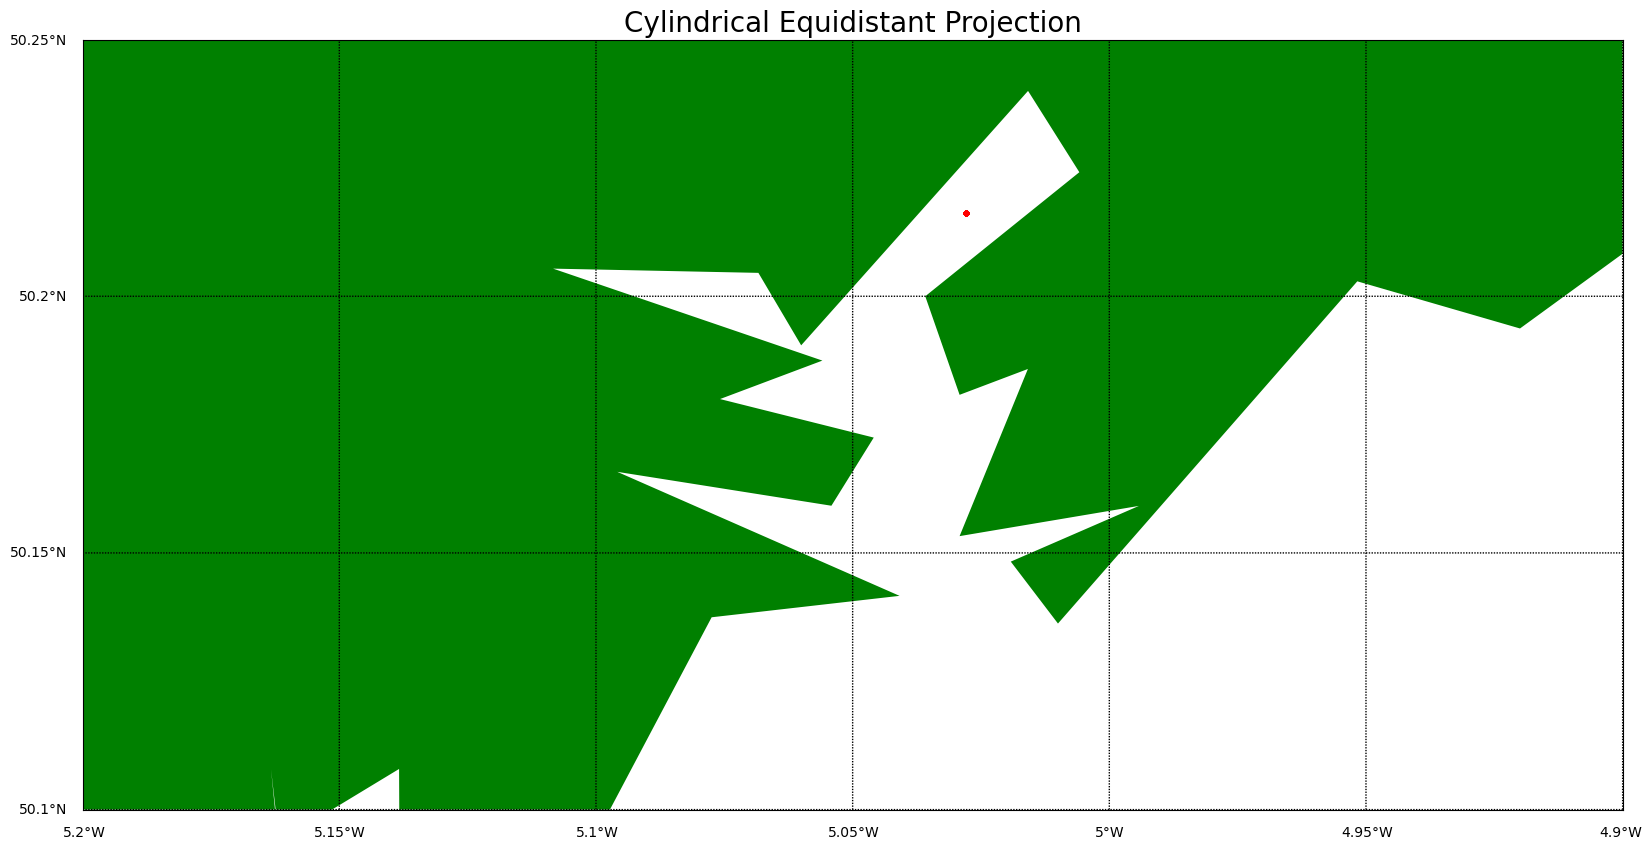

In [9]:
# 1) Intialise figure and figure size
fig = plt.gcf()
fig.set_size_inches(20,10, forward=True)

# 2) Define the map 
# Here we have a cylindrical equidistant projection bound by our chosen latitude and longitudes,
# and a chosen resolution ('i' = intermediate)
m = Basemap(projection='cyl',
            llcrnrlat=lat_min,urcrnrlat=lat_max,
            llcrnrlon=lon_min,urcrnrlon=lon_max,
            resolution='i')

# 3) Fill land masses with green colour
m.fillcontinents(color='green')
# Add title to plot - change as you wish
plt.title("Cylindrical Equidistant Projection", fontsize=20)

# 4) Draw map gridlines - the 'split_lat' and 'split_lon' have been set to show a 0.05x0.05 degree 
# grid, which reflects that given in the ESA CCI data (covered next)
split_lon = round((lon_max - lon_min)/0.05) + 1
lons = np.linspace(lon_min,lon_max,split_lon)
m.drawmeridians(lons,labels=[1,0,0,1])

split_lat = round((lat_max - lat_min)/0.05) + 1
lats = np.linspace(lat_min,lat_max,split_lat)
m.drawparallels(lats,labels=[1,0,0,1])


track_lon, track_lat = m(np.asarray(region_data['Lon']),np.asarray(region_data['Lat']))
plt.scatter(track_lon,track_lat, s=10, marker='o', color='Red') 


plt.show()

### Using FluxEngine
Now we have plotted our data we can use FluxEngine to export the data to netCDF files and run FluxEngine (as in tutorial 02).

Note: don't forget the -h label if you need a reminder of how the commands work

Due to how terminal commands are executed this has to be filled out by hand. The commands for the example dataset have been provided (and I suggest looking through all the included commands), but you will need to write your own (or edit the examples) for your own data.

When using the example datasets you will need to change the input file (first string), -ncOutPath, and the --limits commands. When using your own datasets you will need to check all command inputs, and change values where needed.

(Please also check your datetime format as anything except yyyy-mm-dd hh:mm:ss may cause issues - defintely double check the format if you've used Excel at any point).

In [10]:
# Displays values needed for --limit command below
print(f'These are the values for the limit commands -> South:{lat_min}, North:{lat_max}, West:{lon_min}, East:{lon_max}')
print(f'e.g. --limits {lat_min} {lat_max} {lon_min} {lon_max}')

These are the values for the limit commands -> South:50.1, North:50.25, West:-5.2, East:-4.9
e.g. --limits 50.1 50.25 -5.2 -4.9


In [11]:
# We primarily use FluxEngine from the command line, but here we can import it just to check the version
import fluxengine as fe
import fluxengine.tools.lib_text2ncdf as nc
print(fe.__version__)

4.0


The following cell converts our text file to netCDF for use with FluxEngine.
If changing location to the Agulhas (or your own region) ensure to change the following:
- Text file to read (first argument)
- Coordinates (in order of South, North, West, East) given after --limits
- File name to write out netCDF to given after --ncOutPath
- If using your own data may need to change start and end times too 

In [12]:
nc.convert_text_to_netcdf(['/Users/sayooj/merged_draft_final.tsv'],startTime='2018-09-14 00:00:00',endTime='2018-11-30 08:00:00',ncOutPath='/Users/sayooj/merged-drft-ppr.nc',temporalResolution='01 00:00',
    colNames=['salinity', 'sstskin_c', 'sstskin_k', 'windu10', 'windu10_moment2', 'pco2sw_corr_split', 'pressure_met', 'pco2_air_noaa_2018', 'pco2_sst'],
    latProd='Lat',lonProd='Lon',dateIndex=3,parseUnits=False,temporalChunking=1857,limits=[50,51,-6,-5],dateFormatDayFirst=True)

Calculating dimensions.
The following columns will be extracted:
	 salinity
	 sstskin_c
	 sstskin_k
	 windu10
	 windu10_moment2
	 pco2sw_corr_split
	 pressure_met
	 pco2_air_noaa_2018
	 pco2_sst
Processing data in file /Users/sayooj/merged_draft_final.tsv


/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/tools/lib_text2ncdf.py:98: RuntimeWarning: Mean of empty slice
  output[coords] = np.nanmean(vals);


Writing output netCDF file(s)...
Finished converting text file to netCDF3. There were 0 values which fell outside the specified lat/lon or start/stop time boundaries.
Number of missing values found: 0


Here we load the configuration file and tell FluxEngine our start and end dates. Change config file if using a different region, and change dates if required.

In [13]:
# Running FluxEngine
!fe_run.py "/Users/sayooj/draft_new.conf" -s "2018-09-14" -e "2018-11-30" -l 

Executing on 'Sayoojs-Air-98.lan' at 06/03/2023 01:15:51
Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
14 Sep 2018 00:00:00 completed successf

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
23 Sep 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
02 Oct 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
11 Oct 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
20 Oct 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
29 Oct 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) 

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
07 Nov 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anacon

(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
16 Nov 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time

(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time): Grid dimensions set to: (1, 1)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the saline skin model (0.100000 psu added to skin salinities)
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SST gradient handling is on, using SSTskin and SSTfnd = SSTskin + 0.170000 for flux calculation (ignoring SSTfnd data in configuration file).
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) Using the RAPID model (from Woolf et al., 2016)
(rate_parameterisation.py: k_Nightingale2000.__call__) Using the Nightingale et al., 2000 (N00) k parameterisation
(ofluxghg_flux_calc, FluxEngine._run_fluxengine_) SUCCESS writing file /Users/sayooj/Downloads/FE_FalEstuary_output_Autumn2018gf.nc
Flux engine exited with exit code: 0
25 Nov 2018 00:00:00 completed successfully.

Parsing settings file at: /Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/fluxengine/core/settings.xml
(ofluxghg_flux_calc, FluxEngine._load_lon_lat_time

Finally we can merge our FluxEngine output into our text file. Depending on region, you may need to change the first 3 arguments:
- 1st: FluxEngine output file
- 2nd: Text file to merge to
- 3rd: New file to create with merged data

In [14]:
# Appending FluxEngine results
!fe_append2insitu.py "/Users/sayooj/FE_FalEstuary_output_Autumn2018gf.nc" "/Users/sayooj/merged_draft_final.tsv" "/Users/sayooj/draft_estuary.tsv" --varsToAppend "OF" "OK3" "OSFC" "OIC1" --dateIndex 3 --lonCol "Lon" --latCol "Lat" 


Combining files at  /Users/sayooj/FE_FalEstuary_output_Autumn2018gf.nc and /Users/sayooj/merged_draft_final.tsv
Row 409 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 409 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 409 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 409 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 410 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 410 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 410 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 410 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted instead
Row 411 Warning: No data found for timestep -247 lat 50.216161 lon -5.027979. nan inserted inste

Row 450 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 451 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 451 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 451 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 451 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 452 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 452 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 452 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 452 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 453 Warning: No data found for timestep -216 lat 50.216161 lon -5.027979. nan inserted instead
Row 453 Wa

Row 481 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 481 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 481 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 481 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 482 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 482 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 482 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 482 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 483 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 483 Warning: No data found for timestep -157 lat 50.216161 lon -5.027979. nan inserted instead
Row 483 Wa

Row 513 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 513 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 513 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 513 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 514 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 514 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 514 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 514 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 515 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 515 Warning: No data found for timestep -127 lat 50.216161 lon -5.027979. nan inserted instead
Row 515 Wa

Row 544 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 544 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 545 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 545 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 545 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 545 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 546 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 546 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 546 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 546 Warning: No data found for timestep -96 lat 50.216161 lon -5.027979. nan inserted instead
Row 547 Warning: No 

Row 574 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 574 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 574 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 575 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 575 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 575 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 575 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 576 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 576 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 576 Warning: No data found for timestep -66 lat 50.216161 lon -5.027979. nan inserted instead
Row 576 Warning: No 

Row 605 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 606 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 606 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 606 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 606 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 607 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 607 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 607 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 607 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 608 Warning: No data found for timestep -4 lat 50.216161 lon -5.027979. nan inserted instead
Row 608 Warning: No data found

Row 677 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 677 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 677 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 678 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 678 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 678 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 678 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 679 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 679 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 679 Warning: No data found for timestep 87 lat 50.216161 lon -5.027979. nan inserted instead
Row 679 Warning: No data found

Row 1164 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1164 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1164 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1164 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1165 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1165 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1165 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1165 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1166 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead
Row 1166 Warning: No data found for timestep -246 lat 50.216161 lon -5.027979. nan inserted instead


Row 1194 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1194 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1195 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1195 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1195 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1195 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1196 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1196 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1196 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead
Row 1196 Warning: No data found for timestep -215 lat 50.216161 lon -5.027979. nan inserted instead


Row 1225 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1226 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1226 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1226 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1226 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1227 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1227 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1227 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1227 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead
Row 1228 Warning: No data found for timestep -156 lat 50.216161 lon -5.027979. nan inserted instead


Row 1255 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1255 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1255 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1256 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1256 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1256 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1256 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1257 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1257 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead
Row 1257 Warning: No data found for timestep -126 lat 50.216161 lon -5.027979. nan inserted instead


Row 1286 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1287 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1287 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1287 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1287 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1288 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1288 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1288 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1288 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1289 Warning: No data found for timestep -95 lat 50.216161 lon -5.027979. nan inserted instead
Row 1289 W

Row 1318 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1318 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1318 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1318 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1319 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1319 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1319 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1319 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1320 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1320 Warning: No data found for timestep -65 lat 50.216161 lon -5.027979. nan inserted instead
Row 1320 W

Row 1349 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1349 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1350 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1350 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1350 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1350 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1351 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1351 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1351 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1351 Warning: No data found for timestep -3 lat 50.216161 lon -5.027979. nan inserted instead
Row 1352 Warning: No

Row 1420 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1420 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1420 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1421 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1421 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1421 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1421 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1422 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1422 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1422 Warning: No data found for timestep 88 lat 50.216161 lon -5.027979. nan inserted instead
Row 1422 Warning: No

Finished merging ['OF', 'OK3', 'OSFC', 'OIC1'] from /Users/sayooj/FE_FalEstuary_output_Autumn2018gf.nc with /Users/sayooj/merged_draft_final.tsv
Output written to /Users/sayooj/draft_estuary.tsv


Now we have run FluxEngine and combine our output with our in-situ data, we can go ahead and view/visualise the data.

In [15]:
# Load merged data
merged_data = pd.read_csv('/Users/sayooj/draft_estuary.tsv', sep='\t',index_col=0).reset_index(drop=True)

In [16]:
# View top of merged data
merged_data.head()

,Lon,Lat,Datetime,Date,Year,Month,Day,Hour,Minute,Second,...,windu10,windu10_moment2,pco2sw_corr_split,pressure_met,pco2_air_noaa_2018,pco2_sst,OF [g C m-2 day-1],OK3 [cm h-1],OSFC [g m-3],OIC1 [g m-3]
0,-5.027979,50.216161,2018-09-14 00:00:00,14/09/2018,2018,9,14,0,0,0,...,2.057613,4.233772,500.019450,1024.1,401.3573,16.642000,0.015255,1.420482,0.215483,0.170735
1,-5.027979,50.216161,2018-09-14 00:00:00,14/09/2018,2018,9,14,0,0,0,...,2.057613,4.233772,488.055048,1024.1,401.3573,16.642000,0.015255,1.420482,0.215483,0.170735
2,-5.027979,50.216161,2018-09-14 01:00:00,14/09/2018,2018,9,14,1,0,0,...,2.057613,4.233772,550.944840,1023.9,401.3573,16.598000,0.015255,1.420482,0.215483,0.170735
3,-5.027979,50.216161,2018-09-14 02:00:00,14/09/2018,2018,9,14,2,0,0,...,2.572016,6.615269,588.035046,1023.5,401.3573,16.514667,0.015255,1.420482,0.215483,0.170735
4,-5.027979,50.216161,2018-09-14 03:00:00,14/09/2018,2018,9,14,3,0,0,...,2.572016,6.615269,627.313939,1022.9,401.3573,16.463000,0.015255,1.420482,0.215483,0.170735


We need to add out 'Days_since' to this new merged dataframe:

In [17]:
# Initialise the new Dataframe column and fill with a hold value
merged_data['Days_since'] = 'hold value'

# Produce a datetime object for the first recording 
# - the zeros in the line below show it's the first row (index starts at zero)
start_date = dt.datetime(merged_data.loc[0,'Year'],merged_data.loc[0,'Month'],merged_data.loc[0,'Day'],
                            merged_data.loc[0,'Hour'],merged_data.loc[0,'Minute'],merged_data.loc[0,'Second'])

# Loop over all rows in the Dataframe - i.e from 0 to the length of the Dataframe
for i in range(0,len(merged_data)):
    # Get the date time object for the currently indexed recording - indexed by i
    future_date = dt.datetime(merged_data.loc[i,'Year'],merged_data.loc[i,'Month'],merged_data.loc[i,'Day'],
                              merged_data.loc[i,'Hour'],merged_data.loc[i,'Minute'],merged_data.loc[i,'Second'])
    
    # Find difference between current datetime and inital datetime
    day_diff = future_date - start_date
    
    # Fill Dataframe column with time difference in seconds (found using .total_seconds()) 
    # divided by 86400 (proportion of days that have passed)
    merged_data.loc[i,'Days_since'] = day_diff.total_seconds()/(60*60*24)

In [18]:
# Show section of 'Days_since' column for visual check
merged_data[['Datetime', 'Days_since']].head(5)

,Datetime,Days_since
0,2018-09-14 00:00:00,0.0
1,2018-09-14 00:00:00,0.0
2,2018-09-14 01:00:00,0.041667
3,2018-09-14 02:00:00,0.083333
4,2018-09-14 03:00:00,0.125


### Plot the Flux

/Users/sayooj/opt/anaconda3/envs/fe_work_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 
The palette list has fewer values (480) than needed (481) and will cycle, which may produce an uninterpretable plot.
  This is separate from the ipykernel package so we can avoid doing imports until


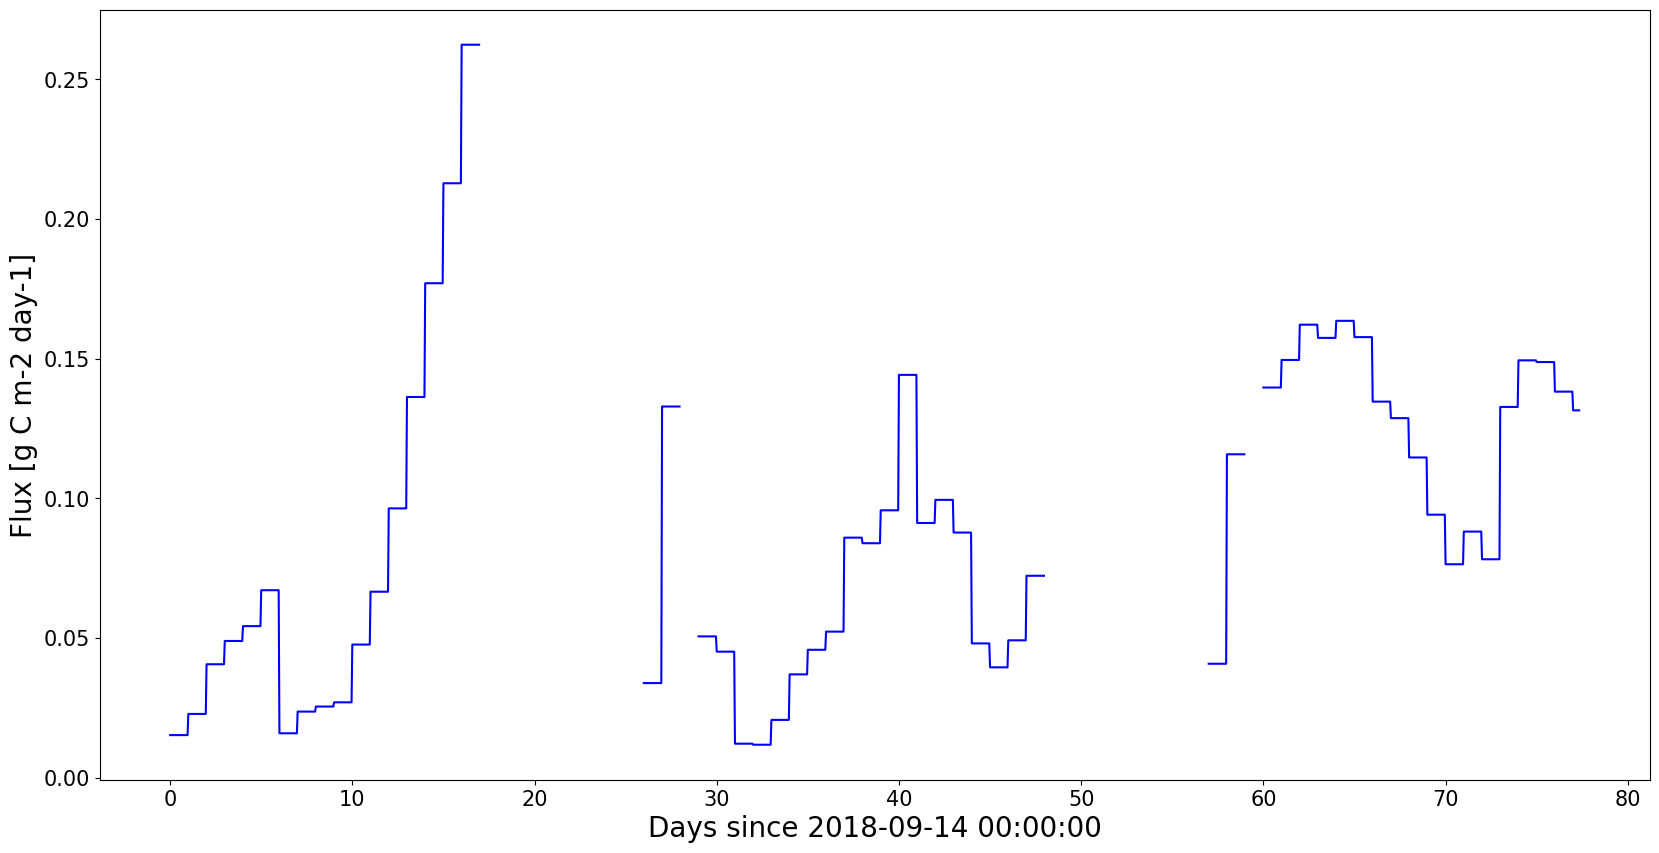

In [19]:
# Set up a figure with 4 axes on it. Sharex=True means all axes will share the bottom axes (can help with clarity)
fig,ax = plt.subplots(1,1, sharex=True, figsize=(20,10))
sns.lineplot(data=merged_data, x='Days_since', y='OF [g C m-2 day-1]', hue=merged_data["OF [g C m-2 day-1]"].isna().cumsum(), palette=["blue"]*sum(merged_data["OF [g C m-2 day-1]"].isna()), legend=False, markers=True)

# Plot features 
plt.xlabel(f'Days since {merged_data.loc[0,"Datetime"]}', fontdict={'size':20})
plt.ylabel('Flux [g C m-2 day-1]', fontdict={'size':20})
plt.tick_params(labelsize=15)

# Show figure!
plt.show()